На основі багатошарової нейронної мережі

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/50
235/235 [==============================] - 17s 42ms/step - loss: 0.2539 - val_loss: 0.1729
Epoch 2/50
235/235 [==============================] - 8s 33ms/step - loss: 0.1583 - val_loss: 0.1440
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1370 - val_loss: 0.1286
Epoch 4/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1264 - val_loss: 0.1216
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1196 - val_loss: 0.1151
Epoch 6/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1144 - val_loss: 0.1108
Epoch 7/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1109 - val_loss: 0.1082
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1081 - val_loss: 0.1052
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1057 - val_loss: 0.1032
Epoch 10/50
235/235 [====

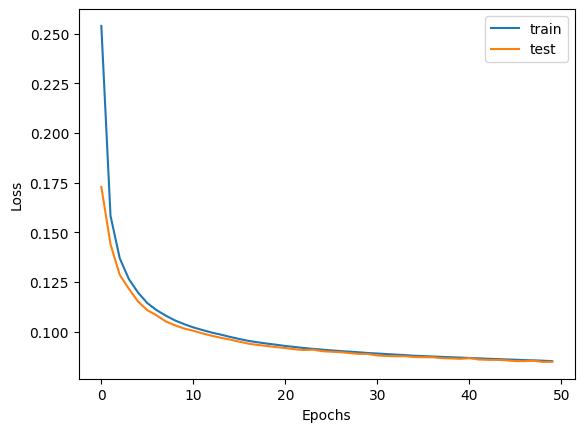

313/313 [==============================] - 1s 3ms/step


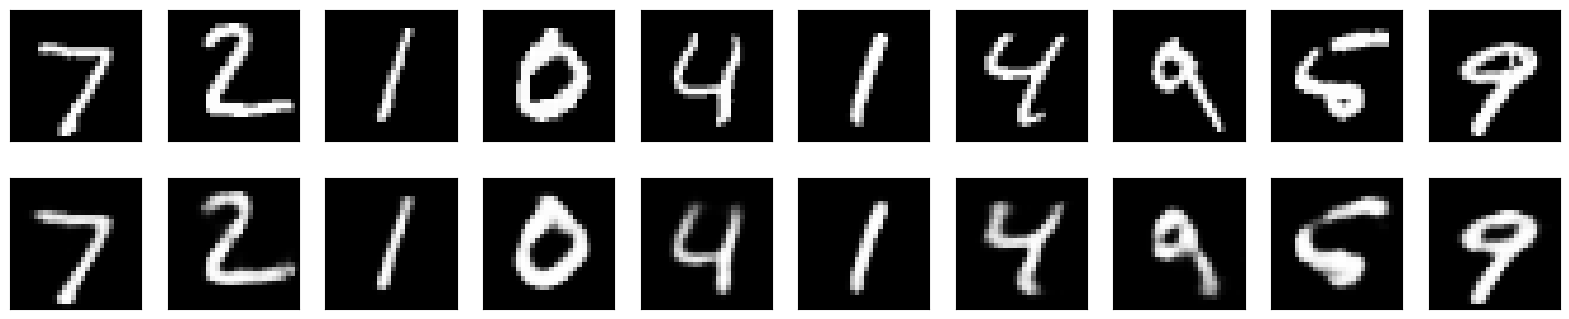

In [2]:
# Завантаження та попередня обробка даних
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Створення моделі автокодувальника
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Результати реконструкції
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Оригінальне зображення
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Реконструйоване зображення
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Висновки для звичайного автокодувальника на основі багатошарової нейронної мережі:
1. Архітектура: Модель складається з трьох шарів кодера та декодера з активацією ReLU на кодері та сигмоїд на декодері.
2. Функція втрат: Використовується бінарна крос-ентропійна функція втрат.
3. Підсумковий результат: Модель здатна ефективно реконструювати рукописні цифри, проте є простіший варіант - автокодувальник на основі згорткової моделі.